# EZ_hit-finder Tutorial
Created on March 7th, 2019.

Authors: Chufeng Li, Nadia Zatsepin

Contact: chufengl@asu.edu; chufengl@icloud.com

Generated from the NSLS-FMX beamline.

# Installation and Environment
Setting up the environment:
1. install [Anaconda3](https://www.anaconda.com/distribution)
2. source /GPFS/CENTRAL/xf17id1/mfuchs/CFL/setup_paths.sh
3. **Rcommend cpu-010**

In [11]:
!which python
!conda env list

/GPFS/CENTRAL/xf17id1/mfuchs/CFL/Anaconda3/bin/python
# conda environments:
#
base                     /GPFS/CENTRAL/xf17id1/mfuchs/CFL/Anaconda3
DatView                  /GPFS/CENTRAL/xf17id1/mfuchs/CFL/Anaconda3/envs/DatView
FMX_tools             *  /GPFS/CENTRAL/xf17id1/mfuchs/CFL/Anaconda3/envs/FMX_tools
                         /home/chufeng/software/anaconda3



In [15]:
%pwd


'/GPFS/CENTRAL/xf17id1/mfuchs/CFL/NSLS_FMX_tools'

# Import all modules needed for the hit-finding processes.¶

In [2]:
import sys,os
sys.path.append('/GPFS/CENTRAL/xf17id1/mfuchs/CFL/NSLS_FMX_tools')
import numpy as np
import matplotlib.pyplot as plt
import NSLS_FMX_utils_mpis as NFUM
import comput_info

In [16]:
%cd ../demo_test/demo_mpi2/
!pwd

/GPFS/CENTRAL/xf17id1/mfuchs/CFL/demo_test/demo_mpi2
/GPFS/CENTRAL/xf17id1/mfuchs/CFL/demo_test/demo_mpi2


# Read in a sample image file for hit-finding parameter tweaking

**Parameter_tweaking mode:**

label_filtered_sorted,weighted_centroid_filtered,props= \
single_peak_finder(CBF_file_name,thld,min_pix,max_pix,mask_file,interact='True')

   * thld: pixel value threshold
   * min_pix: minimal number of pixels for a peak
   * max_pix: maximal number of pixels for a peak
   * mask_file: name of the mask file
   * min_peak: minimal number of peaks for a hit

The shape of the image is : (4371, 4150)


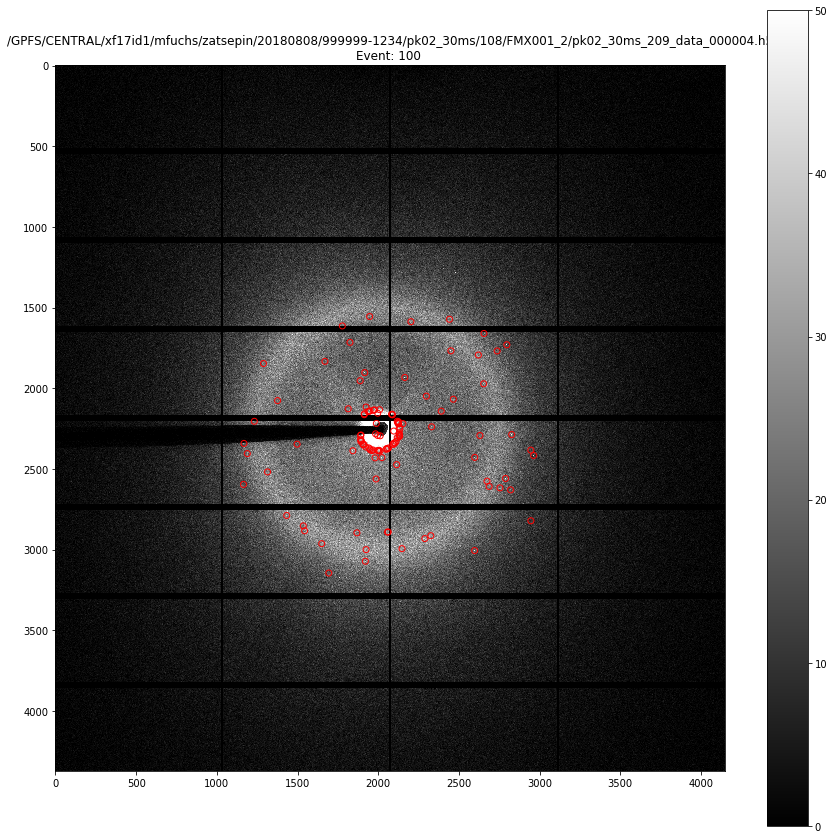

In [13]:
Eiger_file_name=\
'/GPFS/CENTRAL/xf17id1/mfuchs/zatsepin/20180808/999999-1234/pk02_30ms/108/FMX001_2/pk02_30ms_209_data_000004.h5'
frame_no=100
thld=40
min_pix=3
mask_file='None'
interact=True

label_filtered_sorted,weighted_centroid_filtered,props=\
NFUM.single_peak_finder(Eiger_file_name,frame_no,thld,min_pix,mask_file,interact)

# Run hit-finding with tuned parameters

After satisfied with the parmameter tuning above in the interactive mode, we can run the hit fiding in batch mode using the optimized parameters as follows:

Usage:

             ALBA_SX_uitils.py <cbf_file_list_file> <thld> <min_pix> <max_pix> <mask_file> <min_peak> <Region>  


   * thld: pixel value threshold
   * min_pix: minimal number of pixels for a peak
   * max_pix: maximal number of pixels for a peak
   * mask_file: name of the mask file
   * min_peak: minimal number of peaks for a hit
   * Region: 'ALL'(full image), 'C'(central portion), 'Q'(quarter)

In [17]:
!cat ./temp.sh

#!/bin/bash

#source /GPFS/CENTRAL/xf17id1/mfuchs/CFL/setup_paths.sh

script_Dir=/GPFS/CENTRAL/xf17id1/mfuchs/CFL/NSLS_FMX_tools

list_file=../test.lst
thld=120
min_pix=5
max_pix=30
min_peak=15
mask_file=None
Region=C

mpiexec -n 10 python -u $script_Dir/NSLS_FMX_utils_mpis.py $list_file  $thld $min_pix $max_pix $mask_file $min_peak  $Region



In [18]:
!./temp.sh 
#!./temp.sh > hit_finding.out

I am rank 0 of 10
I am rank 8 of 10
I am rank 9 of 10
I am rank 1 of 10
I am rank 4 of 10
I am rank 3 of 10
I am rank 6 of 10
I am rank 2 of 10
I am rank 5 of 10
I am rank 7 of 10
hit finding 1 file  out of 20    
/GPFS/CENTRAL/xf17id1/mfuchs/zatsepin/20180808/999999-1234/pk02_30ms/108/FMX001_2/pk02_30ms_209_data_000001.h5

hit finding 1 file  out of 20    
/GPFS/CENTRAL/xf17id1/mfuchs/zatsepin/20180808/999999-1234/pk02_30ms/108/FMX001_2/pk02_30ms_209_data_000001.h5

hit finding 1 file  out of 20    
/GPFS/CENTRAL/xf17id1/mfuchs/zatsepin/20180808/999999-1234/pk02_30ms/108/FMX001_2/pk02_30ms_209_data_000001.h5

hit finding 1 file  out of 20    
/GPFS/CENTRAL/xf17id1/mfuchs/zatsepin/20180808/999999-1234/pk02_30ms/108/FMX001_2/pk02_30ms_209_data_000001.h5

hit finding 1 file  out of 20    
/GPFS/CENTRAL/xf17id1/mfuchs/zatsepin/20180808/999999-1234/pk02_30ms/108/FMX001_2/pk02_30ms_209_data_000001.h5

hit finding 1 file  out of 20    
/GPFS/CENTRAL/xf17id1/mfuchs/zatsepin/20180808/999999-12

BLANK!    Event  63: 6 peaks found
BLANK!    Event  162: 7 peaks found
BLANK!    Event  313: 2 peaks found
BLANK!    Event  463: 10 peaks found
BLANK!    Event  14: 8 peaks found
BLANK!    Event  264: 9 peaks found
BLANK!    Event  364: 4 peaks found
BLANK!    Event  214: 5 peaks found
BLANK!    Event  415: 4 peaks found
BLANK!    Event  114: 10 peaks found
BLANK!    Event  64: 6 peaks found
BLANK!    Event  314: 2 peaks found
BLANK!    Event  265: 3 peaks found
BLANK!    Event  464: 3 peaks found
BLANK!    Event  163: 7 peaks found
BLANK!    Event  15: 2 peaks found
BLANK!    Event  365: 9 peaks found
BLANK!    Event  416: 7 peaks found
BLANK!    Event  115: 8 peaks found
BLANK!    Event  215: 3 peaks found
BLANK!    Event  65: 5 peaks found
BLANK!    Event  315: 6 peaks found
BLANK!    Event  266: 5 peaks found
BLANK!    Event  164: 13 peaks found
BLANK!    Event  465: 9 peaks found
BLANK!    Event  16: 11 peaks found
BLANK!    Event  417: 13 peaks found
BLANK!    Event  366: 7 peaks

# Check the output files
* .log, eve.lst , and .pkl files are generated for each hit-fingding batch.
* .log: log file of the hit-finding
* eve.lst: hit event list, used for data transfer
* .pk: binary file consisting of the peak information, adopting Cheetah and CrystFEL convention.

In [41]:
!ls -rthl demo_mpi25cores/

total 17M
drwxr-xr-x 2 chufeng chufeng 4.0K May 17 19:53 bk
-rwxr-xr-x 1 chufeng chufeng  345 May 18 03:54 temp.sh
-rw-r--r-- 1 chufeng chufeng 3.3K May 18 04:37 test.lstHIT-rank0.log
-rw-r--r-- 1 chufeng chufeng  15K May 18 04:37 test.lsteve-rank0.lst
-rw-r--r-- 1 chufeng chufeng 1.4M May 18 04:37 test.lst-rank0.pk
-rw-r--r-- 1 chufeng chufeng 3.3K May 18 04:37 test.lstHIT-rank8.log
-rw-r--r-- 1 chufeng chufeng  17K May 18 04:37 test.lsteve-rank8.lst
-rw-r--r-- 1 chufeng chufeng 1.5M May 18 04:37 test.lst-rank8.pk
-rw-r--r-- 1 chufeng chufeng 3.3K May 18 04:37 test.lstHIT-rank7.log
-rw-r--r-- 1 chufeng chufeng  19K May 18 04:37 test.lsteve-rank7.lst
-rw-r--r-- 1 chufeng chufeng 1.5M May 18 04:37 test.lst-rank7.pk
-rw-r--r-- 1 chufeng chufeng 3.3K May 18 04:37 test.lstHIT-rank4.log
-rw-r--r-- 1 chufeng chufeng  19K May 18 04:37 test.lsteve-rank4.lst
-rw-r--r-- 1 chufeng chufeng 1.5M May 18 04:37 test.lst-rank4.pk
-rw-r--r-- 1 chufeng chufeng 3.3K May 18 04:37 test.lstHIT-rank5.log
-rw-

In [19]:
folder_name='../demo_test/demo_mpi25cores'
folder=comput_info.Folder(folder_name)
type(folder)

comput_info.Folder

# Getting Statistics for fast feed back and diagnosis

In [20]:
%matplotlib inline
!python ../NSLS_FMX_tools/comput_info.py . demo_mpi25

Figure(1000x2000)
Figure(640x480)


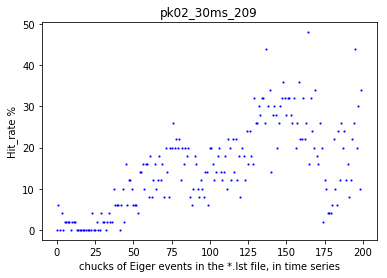

num_cores= 10


In [28]:
num_Eiger_file,Hit_count_all_flat,Hit_rate_all_flat=folder.Get_hit_stats_all()
Eiger_file_pre=folder.Get_hit_stats_single(0)['Eiger_file_pre']
plt.figure(num=1)
plt.plot(Hit_rate_all_flat,'bs',markersize=1)
plt.xlabel('chucks of Eiger events in the *.lst file, in time series')
plt.ylabel('Hit_rate %')
plt.title(Eiger_file_pre)
#plt.savefig('Hit_rate.png')
plt.show()
num_workers=folder.comp_time_lst['num_workers']
print('num_cores=',num_workers)

In [32]:
Eiger_file_pre, peak_arry_new=\
folder.Get_peak_stats_all(cam_len=0.2,photon_energy=12000,\
pixel_size=100e-6,center_x=2185,center_y=2075)  

In [42]:
ind=np.where(peak_arry_new[:,-4]<=1000)
ind=ind[0]
peak_arry_new_f=peak_arry_new[ind,:]
peak_arry_new_f.shape

(101659, 10)

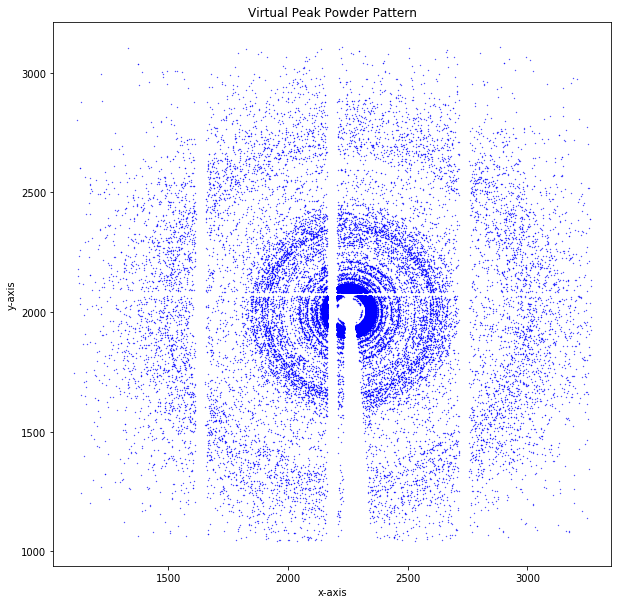

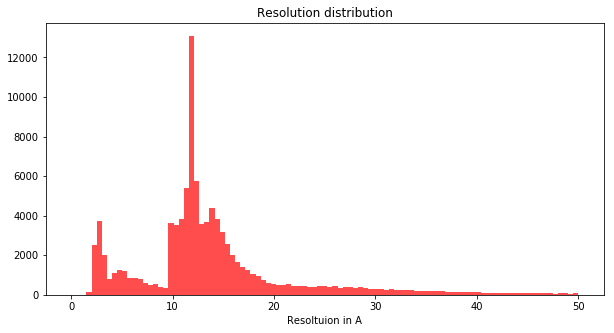

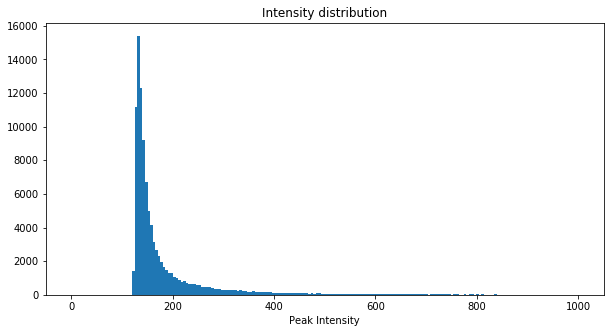

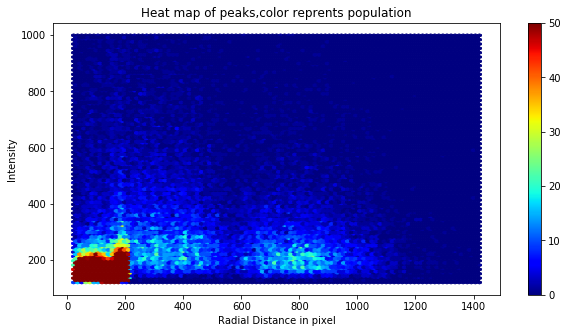

In [82]:
plt.figure(num=2,figsize=(10,10))
plt.scatter(peak_arry_new_f[:,4],peak_arry_new_f[:,5],s=0.1,c='blue')
plt.axis('equal')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Virtual Peak Powder Pattern')
plt.show()
plt.figure(num=3,figsize=(10,5))
plt.hist(peak_arry_new_f[:,-1],bins=np.linspace(0,50,100),color=(1,0.3,0.3))
plt.xlabel('Resoltuion in A')
plt.title('Resolution distribution')
plt.show()
plt.figure(num=4,figsize=(10,5))
plt.hist(peak_arry_new_f[:,-4],bins=np.linspace(0,1000,200))
plt.xlabel('Peak Intensity')
plt.title('Intensity distribution')
plt.show()
plt.figure(num=5,figsize=(10,5))
#plt.scatter(peak_arry_new_f[:,-3],peak_arry_new_f[:,-4],s=0.1,c=(0,0.3,0.3))
plt.hexbin(peak_arry_new_f[:,-3],peak_arry_new_f[:,-4],cmap='jet')
plt.clim(0,50)
plt.colorbar()
plt.xlabel('Radial Distance in pixel')
plt.ylabel('Intensity')
plt.title('Heat map of peaks,color reprents population')
plt.show()

In [25]:
%cd /GPFS/CENTRAL/xf17id1/mfuchs/CFL/demo_test/
Eiger_file_name=\
'/GPFS/CENTRAL/xf17id1/mfuchs/zatsepin/20180808/999999-1234/pk02_30ms/108/FMX001_2/pk02_30ms_209_data_000004.h5'
!ls /GPFS/CENTRAL/xf17id1/mfuchs/zatsepin/20180808/999999-1234/pk02_30ms/108/FMX001_2/
!python /GPFS/CENTRAL/xf17id1/mfuchs/CFL/NSLS_FMX_tools/NSLS_mask_utils.py  $Eiger_file_name 'beam_stop_mask.h5'

/GPFS/CENTRAL/xf17id1/mfuchs/CFL/demo_test
pk02_30ms_209_data_000001.h5  pk02_30ms_209_data_000012.h5
pk02_30ms_209_data_000002.h5  pk02_30ms_209_data_000013.h5
pk02_30ms_209_data_000003.h5  pk02_30ms_209_data_000014.h5
pk02_30ms_209_data_000004.h5  pk02_30ms_209_data_000015.h5
pk02_30ms_209_data_000005.h5  pk02_30ms_209_data_000016.h5
pk02_30ms_209_data_000006.h5  pk02_30ms_209_data_000017.h5
pk02_30ms_209_data_000007.h5  pk02_30ms_209_data_000018.h5
pk02_30ms_209_data_000008.h5  pk02_30ms_209_data_000019.h5
pk02_30ms_209_data_000009.h5  pk02_30ms_209_data_000020.h5
pk02_30ms_209_data_000010.h5  pk02_30ms_209_master.h5
pk02_30ms_209_data_000011.h5
-----------
 Creating the beam stop mask, Please wait.
-----------
 ALL DONE!


# Composing a mask

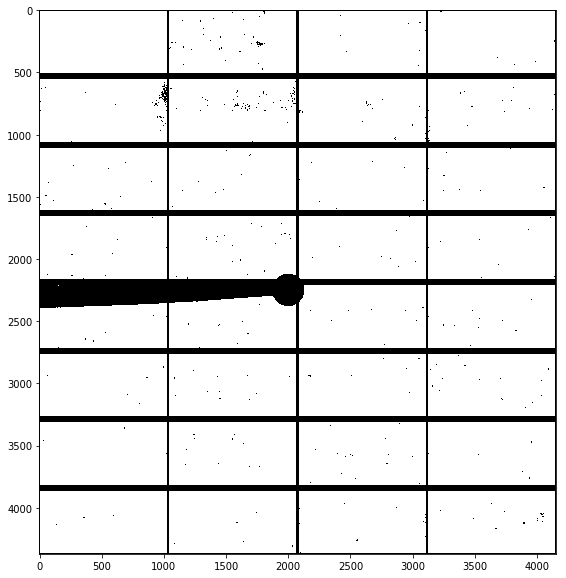

In [31]:
import h5py
mask_file='/GPFS/CENTRAL/xf17id1/mfuchs/CFL/for_NSLS/12_7keV/mask-march.h5'
m=h5py.File(mask_file,'r')
msk_arry=np.array(m['/data/data'])
m.close()
plt.figure(figsize=(10,10))
plt.imshow(msk_arry,cmap='gray')
plt.show()

# Better quality

The shape of the image is : (4371, 4150)


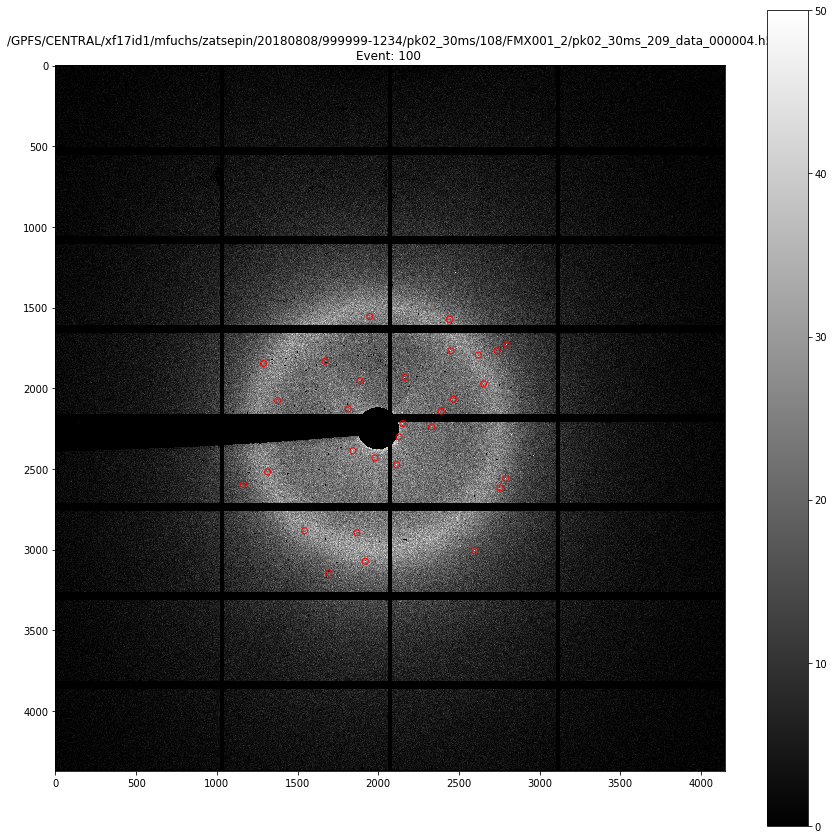

In [37]:
Eiger_file_name=\
'/GPFS/CENTRAL/xf17id1/mfuchs/zatsepin/20180808/999999-1234/pk02_30ms/108/FMX001_2/pk02_30ms_209_data_000004.h5'
frame_no=100
thld=50
min_pix=3
mask_file='/GPFS/CENTRAL/xf17id1/mfuchs/CFL/for_NSLS/12_7keV/mask-march.h5'
interact=True

label_filtered_sorted,weighted_centroid_filtered,props=\
NFUM.single_peak_finder(Eiger_file_name,frame_no,thld,min_pix,mask_file,interact)